In [2]:
from typing import Any, List
import os, pathlib, glob

from moddipic.core.data.abstract import Representation

try:
    from moddipic.modules.rdkit.representations import RDKitMolRep
    from rdkit import Chem
except: print("Warning: Failed to load rdkit inside cuby4") 
# TODO: This doesn't work... Find another method to not import everything.

CUBY4_TMP_PATH = "."

class Cuby4InputMoleculeRep(Representation):
    rep_name = "cuby4_geometry"

    def __init__(self, geometry_path: str, charge: int, setpi: List[str],
                 setcharge: List[str], cvb: List[str]):
        self.geometry_path: str = geometry_path # NOTE: Not saved right away.
        self.charge: int = charge
        self.setpi: List[str] = setpi
        self.setcharge: List[str] = setcharge
        self.cvb: List[str] = cvb
    
    @classmethod 
    def from_RDKitMolRep(cls, rdmol_rep: RDKitMolRep):
        rdmol: Chem.Mol = Chem.Mol(rdmol_rep.data)
        charge = Chem.GetFormalCharge(rdmol)
        setpi = cls.rdmol_to_setpi(rdmol)
        setcharge = cls.rdmol_to_setcharge(rdmol)
        cvb = cls.rdmol_to_cvb(rdmol)
        geometry_path = cls.get_filename() + ".sdf" # TODO: Fix this...
        return cls(geometry_path, charge, setpi, setcharge, cvb)

    @staticmethod
    def get_filename():
        while True:
            prefix = "CB4_Geom_"
            rand_str = Representation.get_filename()
            full_prefix = os.path.join(
                str(pathlib.Path(CUBY4_TMP_PATH).absolute()),
                prefix+rand_str
            )
            if not glob.glob(full_prefix+"*"):
                return full_prefix

    @staticmethod
    def rdmol_to_setpi(rdmol: Chem.Mol) -> List[str]:
        setpi = []
        no_res_mol = Chem.Mol(rdmol)
        Chem.Kekulize(no_res_mol)
        for bond in no_res_mol.GetBonds():
            if bond.GetBondType() == Chem.BondType.DOUBLE or \
                bond.GetBondType() == Chem.BondType.TRIPLE:
                setpi.append(f"{bond.GetBeginAtom().GetIdx()+1};{bond.GetEndAtom().GetIdx()+1}")
            if bond.GetBondType() == Chem.BondType.TRIPLE:
                setpi.append(f"{bond.GetBeginAtom().GetIdx()+1};{bond.GetEndAtom().GetIdx()+1}")
        return setpi
    
    @staticmethod
    def rdmol_to_setcharge(rdmol: Chem.Mol) -> List[str]:
        def helper(x):
            if x == 0: return str(x)
            if x > 0:
                return str("'+'") * x
            if x < 0:
                return str("'-'") * (-x)
        setcharge = [f"{a.GetIdx()+1}: {helper(a.GetFormalCharge())}" 
                    for a in rdmol.GetAtoms()]
        return setcharge
    
    @staticmethod
    def rdmol_to_cvb(rdmol: Chem.Mol) -> Any:
        cvb_list = []
        for atom1 in range(rdmol.GetNumAtoms()):
            for atom2 in range(atom1+1,rdmol.GetNumAtoms()):
                if not rdmol.GetBondBetweenAtoms(atom1, atom2):
                    if rdmol.GetAtomWithIdx(atom1).GetSymbol() == "O" and \
                        rdmol.GetAtomWithIdx(atom2).GetSymbol() == "O":
                        cvb_list.append(f"{atom1+1}:-{atom2+1}")

        return cvb_list
    
    def __repr__(self) -> str:
        repr_text = f"<Cuby4InputMoleculeRep(path='{self.geometry_path}', " + \
            f"charge={self.charge})>"
        return repr_text
        

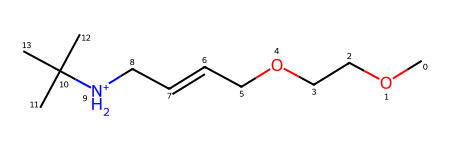

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

rdmol = Chem.MolFromSmiles("COCCOCC=CC[NH2+]C(C)(C)C")
rdmol

In [4]:
Cuby4InputMoleculeRep.from_RDKitMolRep(RDKitMolRep(rdmol))

<Cuby4InputMoleculeRep(path='/home/arazthexd/projects/002_sqm/CB4_Geom_1PX182.sdf', charge=1)>

In [3]:
from openff.toolkit import Topology

Topology.from_pdb("/home/arazthexd/projects/002_sqm/data/tmp/protein_clean.pdb")

In [3]:
path1 = "/home/arazthexd/projects/002_sqm/data/targets/kguD.pdb"
path2 = "/home/arazthexd/projects/002_sqm/tests/modules/rdkit/files/rec.pdb"
path3 = "/home/arazthexd/projects/002_sqm/data/tmp/protein_clean.pdb"

In [ ]:
# 1
from Bio.PDB import 

In [7]:
t = True
try:
    from rdkit import Chem
    from rdkit.Chem import rdDistGeom
except:
    pass

class A:
    aa = 1

    if t:
        @classmethod
        def hi(cls):
            print("hi")
    else:
        @classmethod
        def hi(cls):
            print("bye")

In [27]:
mol = Chem.MolFromSmiles("CCCCC(=O)[O-]")
mol = Chem.AddHs(mol)
rdDistGeom.EmbedMolecule(mol)
# [l.split() for l in Chem.MolToXYZBlock(mol).split("\n")[2:-1]]
print(Chem.MolToPDBBlock(mol))

HETATM    1  C1  UNL     1      -2.041   0.027   0.004  1.00  0.00           C  
HETATM    2  C2  UNL     1      -0.968  -0.483  -0.908  1.00  0.00           C  
HETATM    3  C3  UNL     1       0.382  -0.646  -0.273  1.00  0.00           C  
HETATM    4  C4  UNL     1       0.921   0.644   0.311  1.00  0.00           C  
HETATM    5  C5  UNL     1       2.268   0.303   0.900  1.00  0.00           C  
HETATM    6  O1  UNL     1       3.040  -0.381   0.174  1.00  0.00           O  
HETATM    7  O2  UNL     1       2.649   0.710   2.178  1.00  0.00           O1-
HETATM    8  H1  UNL     1      -2.202  -0.760   0.799  1.00  0.00           H  
HETATM    9  H2  UNL     1      -2.955   0.140  -0.637  1.00  0.00           H  
HETATM   10  H3  UNL     1      -1.785   1.009   0.445  1.00  0.00           H  
HETATM   11  H4  UNL     1      -1.287  -1.527  -1.216  1.00  0.00           H  
HETATM   12  H5  UNL     1      -0.894   0.088  -1.856  1.00  0.00           H  
HETATM   13  H6  UNL     1  

In [29]:
from moddipic.modules.mopac.representations import MOPACInputRep
from moddipic.modules.rdkit.representations import RDKitMolRep

In [31]:
rep = MOPACInputRep.from_RDKitMolRep(RDKitMolRep(mol))

In [33]:
print(rep.coordinates)

HETATM    1  C1  UNL     1      -2.041   0.027   0.004  1.00  0.00           C  
HETATM    2  C2  UNL     1      -0.968  -0.483  -0.908  1.00  0.00           C  
HETATM    3  C3  UNL     1       0.382  -0.646  -0.273  1.00  0.00           C  
HETATM    4  C4  UNL     1       0.921   0.644   0.311  1.00  0.00           C  
HETATM    5  C5  UNL     1       2.268   0.303   0.900  1.00  0.00           C  
HETATM    6  O1  UNL     1       3.040  -0.381   0.174  1.00  0.00           O  
HETATM    7  O2  UNL     1       2.649   0.710   2.178  1.00  0.00           O1-
HETATM    8  H1  UNL     1      -2.202  -0.760   0.799  1.00  0.00           H  
HETATM    9  H2  UNL     1      -2.955   0.140  -0.637  1.00  0.00           H  
HETATM   10  H3  UNL     1      -1.785   1.009   0.445  1.00  0.00           H  
HETATM   11  H4  UNL     1      -1.287  -1.527  -1.216  1.00  0.00           H  
HETATM   12  H5  UNL     1      -0.894   0.088  -1.856  1.00  0.00           H  
HETATM   13  H6  UNL     1  